# <u color='blue'> ARIMA Time Series ForeCasting </u>
### AutoRegressive Integrated Moving Average:  It is a class of model that captures a suite of different standard temporal structures in time series data.


In [1]:
#Importing corresponding libraries required

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

##### Data: Monthly/Annual carbon dioxide emissions from electricity generation from the Energy Information Administration. Data is broken down by fuel type.
##### Source: Kaggle


In [3]:
df = pd.read_csv("Data/MER_T12_06.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
#Reading the dataset as a time series dataset by passing special arguments
'''
The arguments can be explained:

parse_dates: This is a key to identify the date time column. Example, the column name is ‘YYYYMM’.
index_col: This is a key that forces pandas to use the date time column as index.
date_parser: Converts an input string into datetime variable.

'''


dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("Data/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
#Dropping the rows with null values
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [8]:
#Converting Carbon emission values into numeric datatype
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [9]:
ts.dtypes

MSN              object
Value           float64
Column_Order      int64
Description      object
Unit             object
dtype: object

In [10]:
#Dropping rows with empty cells for 'Value'
ts.dropna(inplace = True)

### Time Series Dataset Visualization

In [11]:
#The dataset has 8 different sources of emission of CO2, so grouping the emission values by the emission type
Energy_sources = ts.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


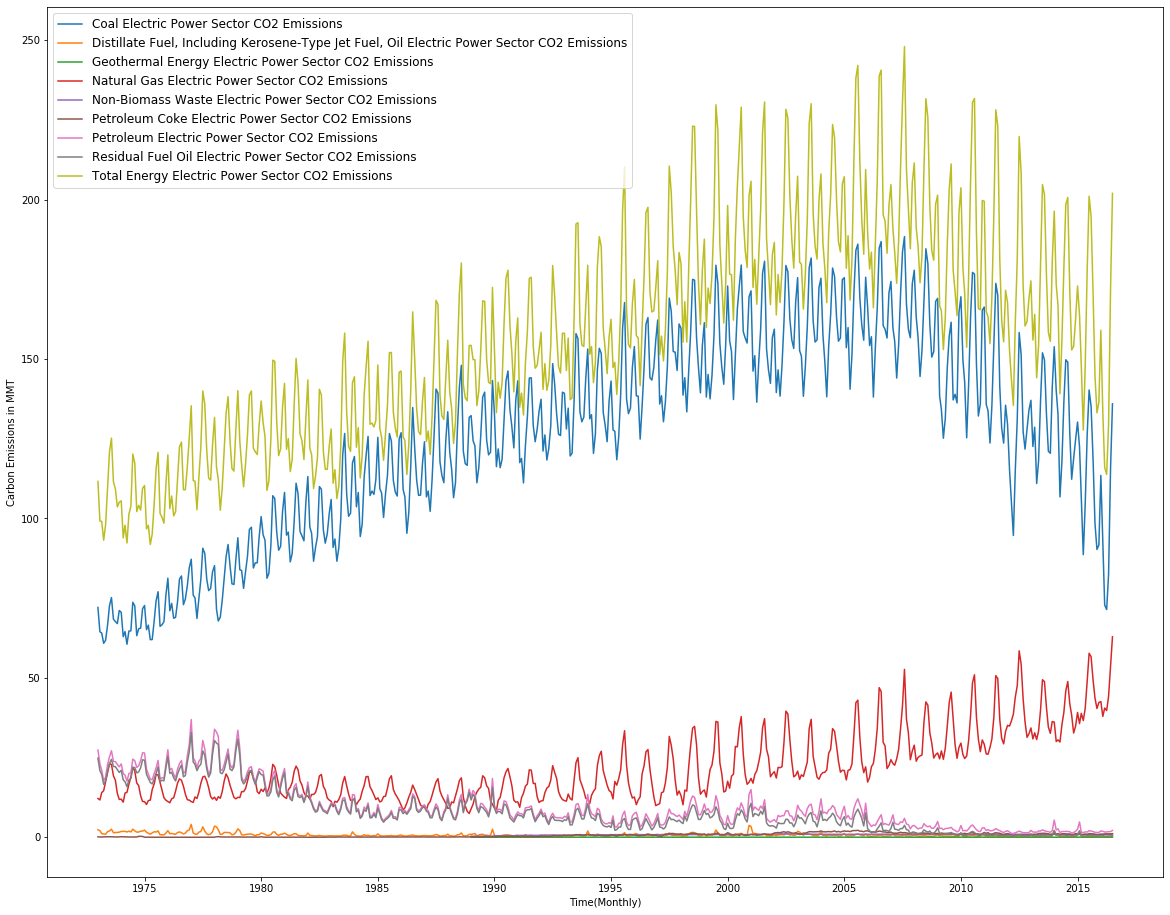

In [12]:
#Dependency of emission of power generation with time

fig, ax = plt.subplots()
for desc, group in Energy_sources:
    plt.plot(group.index, group['Value'],label=desc)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')    
ax.legend(fontsize = 12)
plt.show()

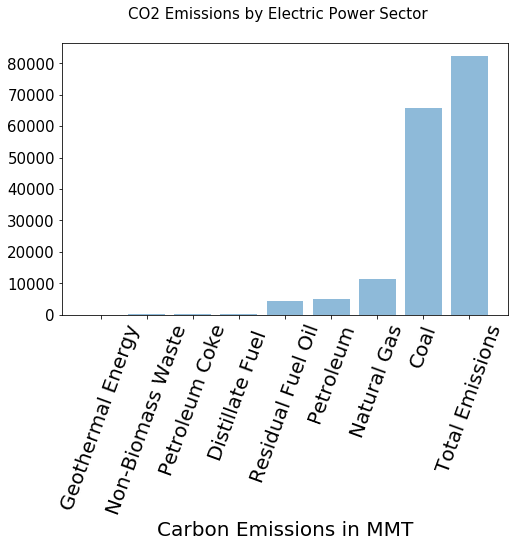

In [16]:
#Bar plot of yearly CO2 emissions by corresponding sources

CO2_per_source = ts.groupby('Description')['Value'].sum().sort_values()
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
fig = plt.figure(figsize = (8,5))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 15)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 15)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()



For developing the time series model and make forcasting, we will use the natural gas CO2 emission from the electrical power generetion. First, let us slice this data as follows:


In [19]:
Emissions = ts.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq = 'M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

First, we will create a plot of the time series data at hand so that we can get an idea of the overall seasonality of the series. After trend and seasonality are assessed if they are present in the dataset, they will be removed from the series to transform the nonstationary dataset into stationary and the residuals are further analyzed. 

In [20]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

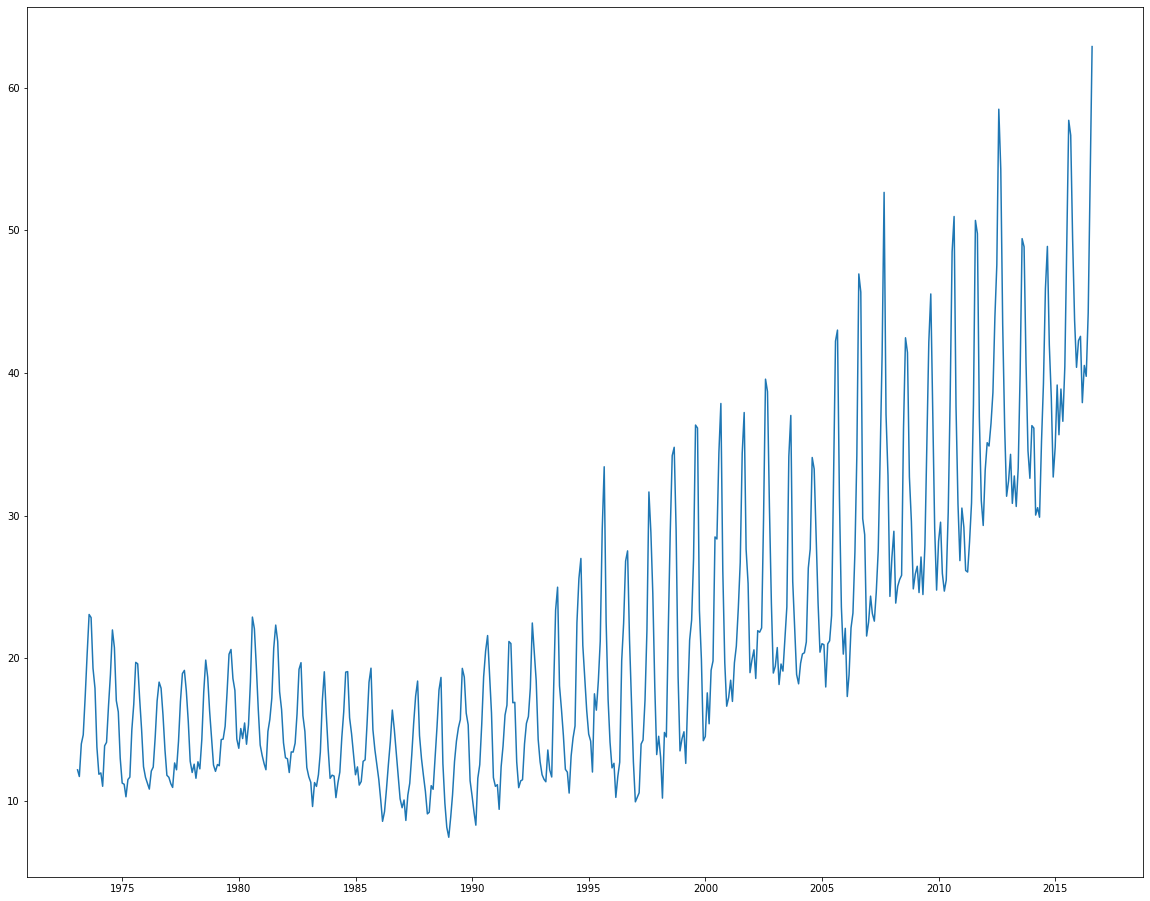

In [21]:
plt.plot(mte)

There is evident seasonal variation in the dataset and hence it can be said that the data is not stationary
 
### Dickey-Fuller Test for stationarity

In [38]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()    
    
    fig = plt.figure(figsize = (15,8))
    fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 15)
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.xlabel('Time in Years', fontsize = 15)
    plt.ylabel('Total Emissions', fontsize = 15)
    plt.legend(loc='best', fontsize = 15)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 15)
    plt.show(block= True)

In [36]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

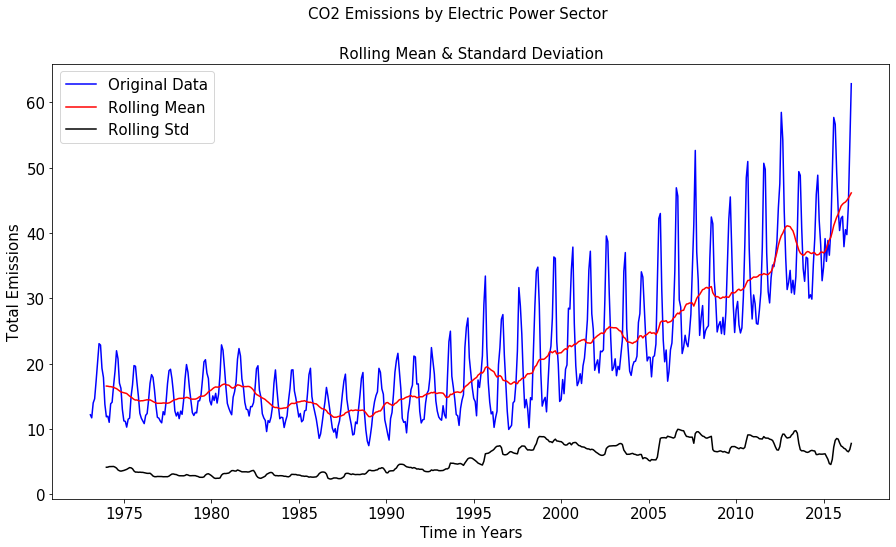

In [39]:
TestStationaryPlot(mte)

Now we will be transforming this data into stationary


The most common techniques used to estimate or model trend and then remove it from the time series are

    Aggregation – taking average for a time period like monthly/weekly average
    Smoothing – taking rolling averages
    Polynomial Fitting – fit a regression model

